# Results


In [1]:
import sys
sys.path.insert(0, '..')
from utils import plot_stroke, plot_stroke_with_ending, plot_stroke_with_ending2

This is what you should modify:

In [2]:
from models.dummy import generate_unconditionally, generate_conditionally, recognize_stroke

Please, don't modify anything below.

### Unconditional generation:

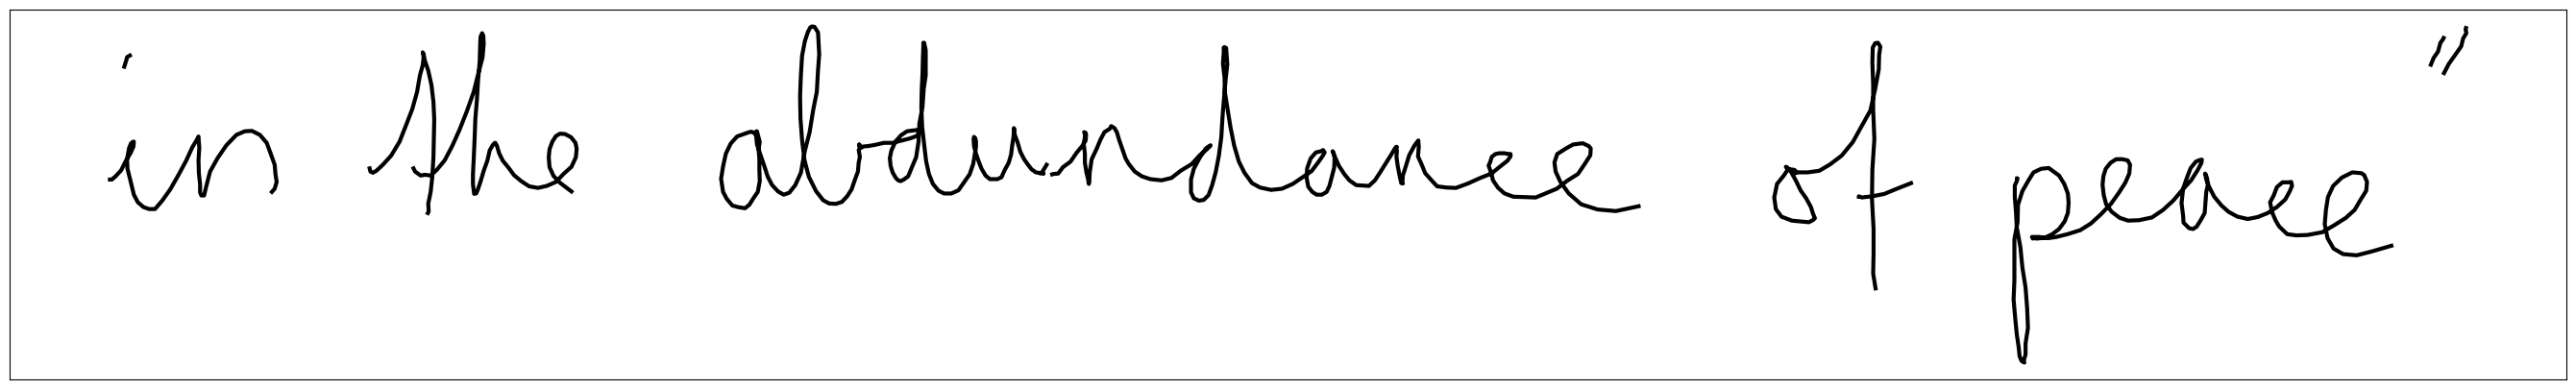

In [3]:
stroke = generate_unconditionally()
plot_stroke(stroke)

### Conditional generation:

In [13]:
import os
current_directory = os.getcwd()
project_dir = os.path.abspath(os.path.join(current_directory, os.pardir))
os.chdir(project_dir)


In [14]:

from data.stroke_dataset import Stroke_dataset
from models.lstm_model import Condition_LSTM
import torch
import torch.nn.functional as F
import numpy as np

import random
import matplotlib.pyplot as plt
from utils import plot_stroke_with_ending, plot_stroke_with_ending2

46
have problems with their balances, will again

shape of target:  torch.Size([1157, 3])
c_seq torch.Size([1, 46, 78])
prediction torch.Size([1, 3])
predictions torch.Size([1157, 1, 3])
predictions torch.Size([1, 1157, 3])
tensor([[ 0.0000, -0.0317, -0.0977],
        [ 0.0000, -0.0597, -0.1246],
        [ 0.0000, -0.0784, -0.1362],
        [ 0.0000, -0.0893, -0.1412],
        [ 0.0000, -0.0955, -0.1432],
        [ 0.0000, -0.0988, -0.1439],
        [ 0.0000, -0.1007, -0.1441],
        [ 0.0000, -0.1017, -0.1441],
        [ 0.0000, -0.1023, -0.1441],
        [ 0.0000, -0.1026, -0.1439],
        [ 0.0000, -0.1028, -0.1438],
        [ 0.0000, -0.1029, -0.1438],
        [ 0.0000, -0.1030, -0.1437],
        [ 0.0000, -0.1030, -0.1436],
        [ 0.0000, -0.1031, -0.1436],
        [ 0.0000, -0.1031, -0.1435],
        [ 0.0000, -0.1031, -0.1435],
        [ 0.0000, -0.1031, -0.1435],
        [ 0.0000, -0.1031, -0.1435],
        [ 0.0000, -0.1031, -0.1435],
        [ 0.0000, -0.1031, -0.1435],

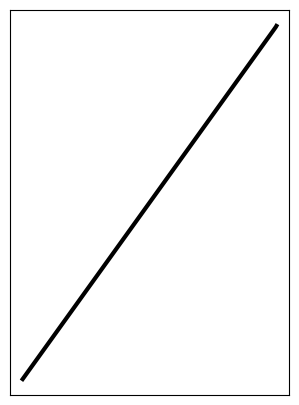

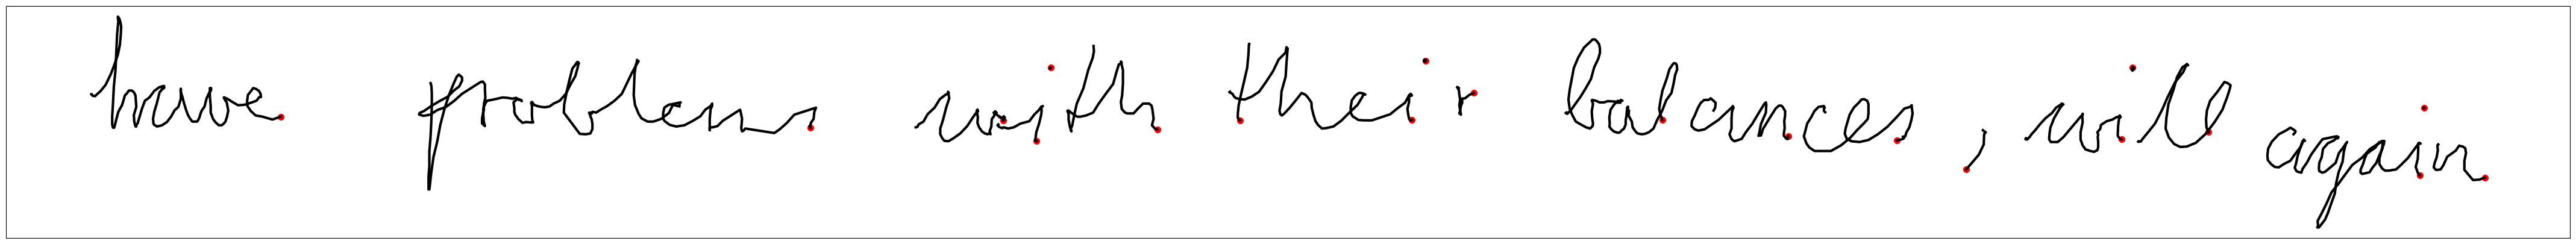

In [17]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize  model
model = Condition_LSTM(
    alphabet_size=78,
    window_K=10,
    input_size=3,
    hidden_size=400,
    num_layers=1,
    component_K=20
).to(DEVICE)

model.load_state_dict(torch.load('models/condition_lstm_1e_4800.pt'))

model.eval()
dataset = Stroke_dataset(train=False)

sample = dataset[random.randint(0, len(dataset))]
target, c_seq = sample
indices = np.argmax(c_seq, axis=1)
sentence = ''.join([dataset.vocab[index] for index in indices])
print(len(sentence))
print(sentence)
print("shape of target: ", target.shape)
seq_len = len(target)

# Predict
initial_input = torch.zeros(1, 1, 3).to(DEVICE)
predictions = model.predict(initial_input, c_seq.unsqueeze(0), seq_len)


torch.set_printoptions(threshold=10_000)
print(predictions[0])
print(target)
torch.set_printoptions(profile="default")
plot_stroke_with_ending2(predictions[0])
plot_stroke_with_ending(target)

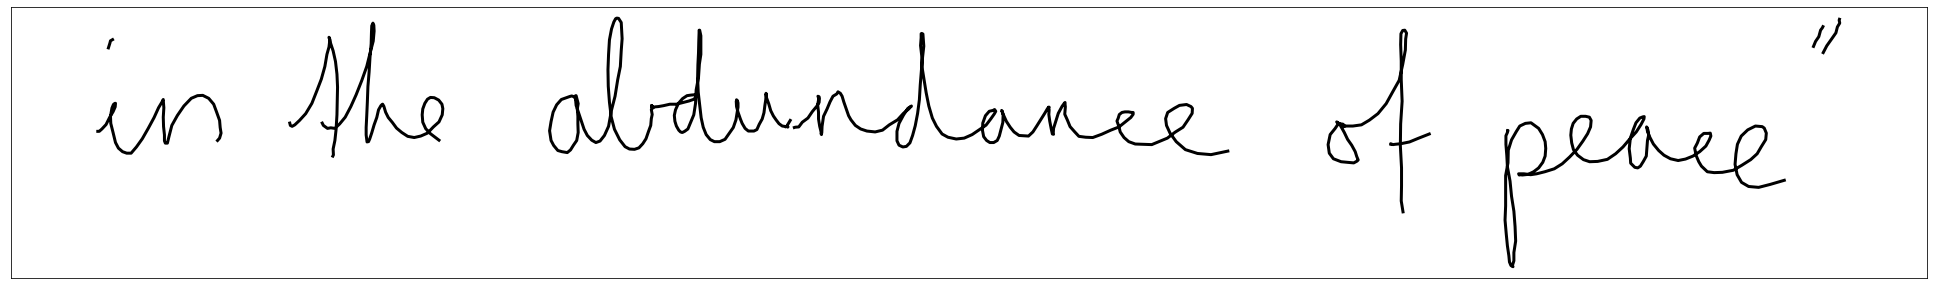

In [ ]:
stroke = generate_conditionally(text='welcome to lyrebird')
plot_stroke(stroke)

### Handwriting recognition:

In [ ]:
text = recognize_stroke(stroke)
print(text)